# Partie visualisation

## Création du dataframe

In [108]:
import os
import json
import pandas as pd
data = []

for filename in os.listdir("metadata"):
    if filename.endswith(".json"):
        with open(os.path.join("metadata", filename), "r") as f:
            metadata = json.load(f)

        name = metadata.get("name")
        scientific_name = metadata.get("scientific_name")
        family = metadata.get("family")
        location = metadata.get("location")
        width = metadata.get("width")
        height = metadata.get("height")
        format = metadata.get("format")
        mode = metadata.get("mode")
        dominated_colors = metadata.get("dominated_colors")
        dominated_colors_name = metadata.get("dominated_colors_name")
        exif = metadata.get("exif", {})
        make = exif.get("Make")
        model = exif.get("Model")
        orientation = exif.get("Orientation")
        if "exif" in metadata and "DateTime" in metadata["exif"]:
            date_time = metadata['exif']['DateTime'][:4]
        else:
            date_time = None

        data.append({
            "name": name,
            "scientific_name": scientific_name,
            "family": family,
            "location": location,
            "filename": filename,
            "width": width,
            "height": height,
            "format": format,
            "mode": mode,
            "dominated_colors": dominated_colors,
            "dominated_colors_name": dominated_colors_name,
            "make": make,
            "model": model,
            "orientation": orientation,
            "year": date_time
        })

df = pd.DataFrame(data)

df

,name,scientific_name,family,location,filename,width,height,format,mode,dominated_colors,dominated_colors_name,make,model,orientation,year
0,Herbertia,Herbertia,Tigridieae,South America,Herbertia%20lahue.json,1589.0,1590.0,JPEG,RGB,"[#495328, #bab8da]","[darkolivegreen, lightsteelblue]","CASIO COMPUTER CO.,LTD.",EX-Z1080,1.0,2009
1,Cortaderia,Cortaderia,Danthonieae,South America,Cortaderia%20selloana0.json,480.0,640.0,JPEG,RGB,"[#9fa790, #2d3920]","[darkseagreen, darkslategrey]",None,None,NaN,None
2,Anredera cordifolia,Anredera cordifolia,Anredera,South America,Anredera%20Cordifolia.json,600.0,450.0,JPEG,RGB,"[#445021, #a6b590]","[darkolivegreen, darkseagreen]",None,None,NaN,None
3,Helicostylis,Helicostylis,Moraceae,South America,13521-Helicostylis%20elegans-Caura.json,1828.0,1407.0,JPEG,RGB,"[#7e9e6c, #2c401c]","[grey, darkslategrey]",Canon,Canon EOS 400D DIGITAL,1.0,2007
4,Kielmeyera,Kielmeyera,Calophyllaceae,South America,Kielmeyera%20variabilis.json,768.0,1024.0,JPEG,RGB,"[#3a2f19, #9d8965]","[darkslategrey, grey]",SONY,DSC-H5,NaN,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,Armatocereus procerus,Armatocereus procerus,Armatocereus,South America,Armatocereus%20procerus%20plant%20tip.json,4032.0,1908.0,JPEG,RGB,"[#c5b9ad, #5d5546]","[silver, darkolivegreen]",samsung,SM-G975F,6.0,2020
139,Tepuia,Tepuia,Ericaceae,South America,Flor%20Tepuia%20venusta.json,346.0,374.0,JPEG,RGB,"[#08090c, #bf3f6b]","[black, indianred]",None,None,1.0,2019
140,Nassauvia,Nassauvia,Nassauvieae,South America,Nassauvia%20aculeata%201.json,950.0,800.0,JPEG,RGB,"[#2e2c28, #918f74]","[darkslategrey, grey]",None,None,NaN,None
141,Tithonia,Tithonia,Heliantheae,South America,Tithonia%20diversifolia.json,2304.0,1728.0,JPEG,RGB,"[#98a148, #354420]","[yellowgreen, darkslategrey]",EASTMAN KODAK COMPANY,KODAK DX6440 ZOOM DIGITAL CAMERA,1.0,None


## Nombre de photos par année

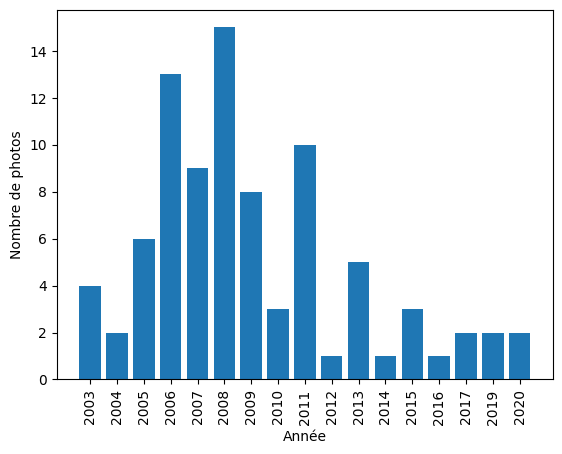

In [109]:
from pandas.io.json import json_normalize
import pandas as pd
import json
import math
import matplotlib.pyplot as plot

year_counts = df.groupby('year').size()

plot.bar(year_counts.index, year_counts.values)
plot.xlabel('Année')
plot.ylabel('Nombre de photos')
plot.xticks(rotation=90)
plot.show()


## Nombre de photos par année et par marque d'appareil

/home/emdev/.local/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 0 ( ) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


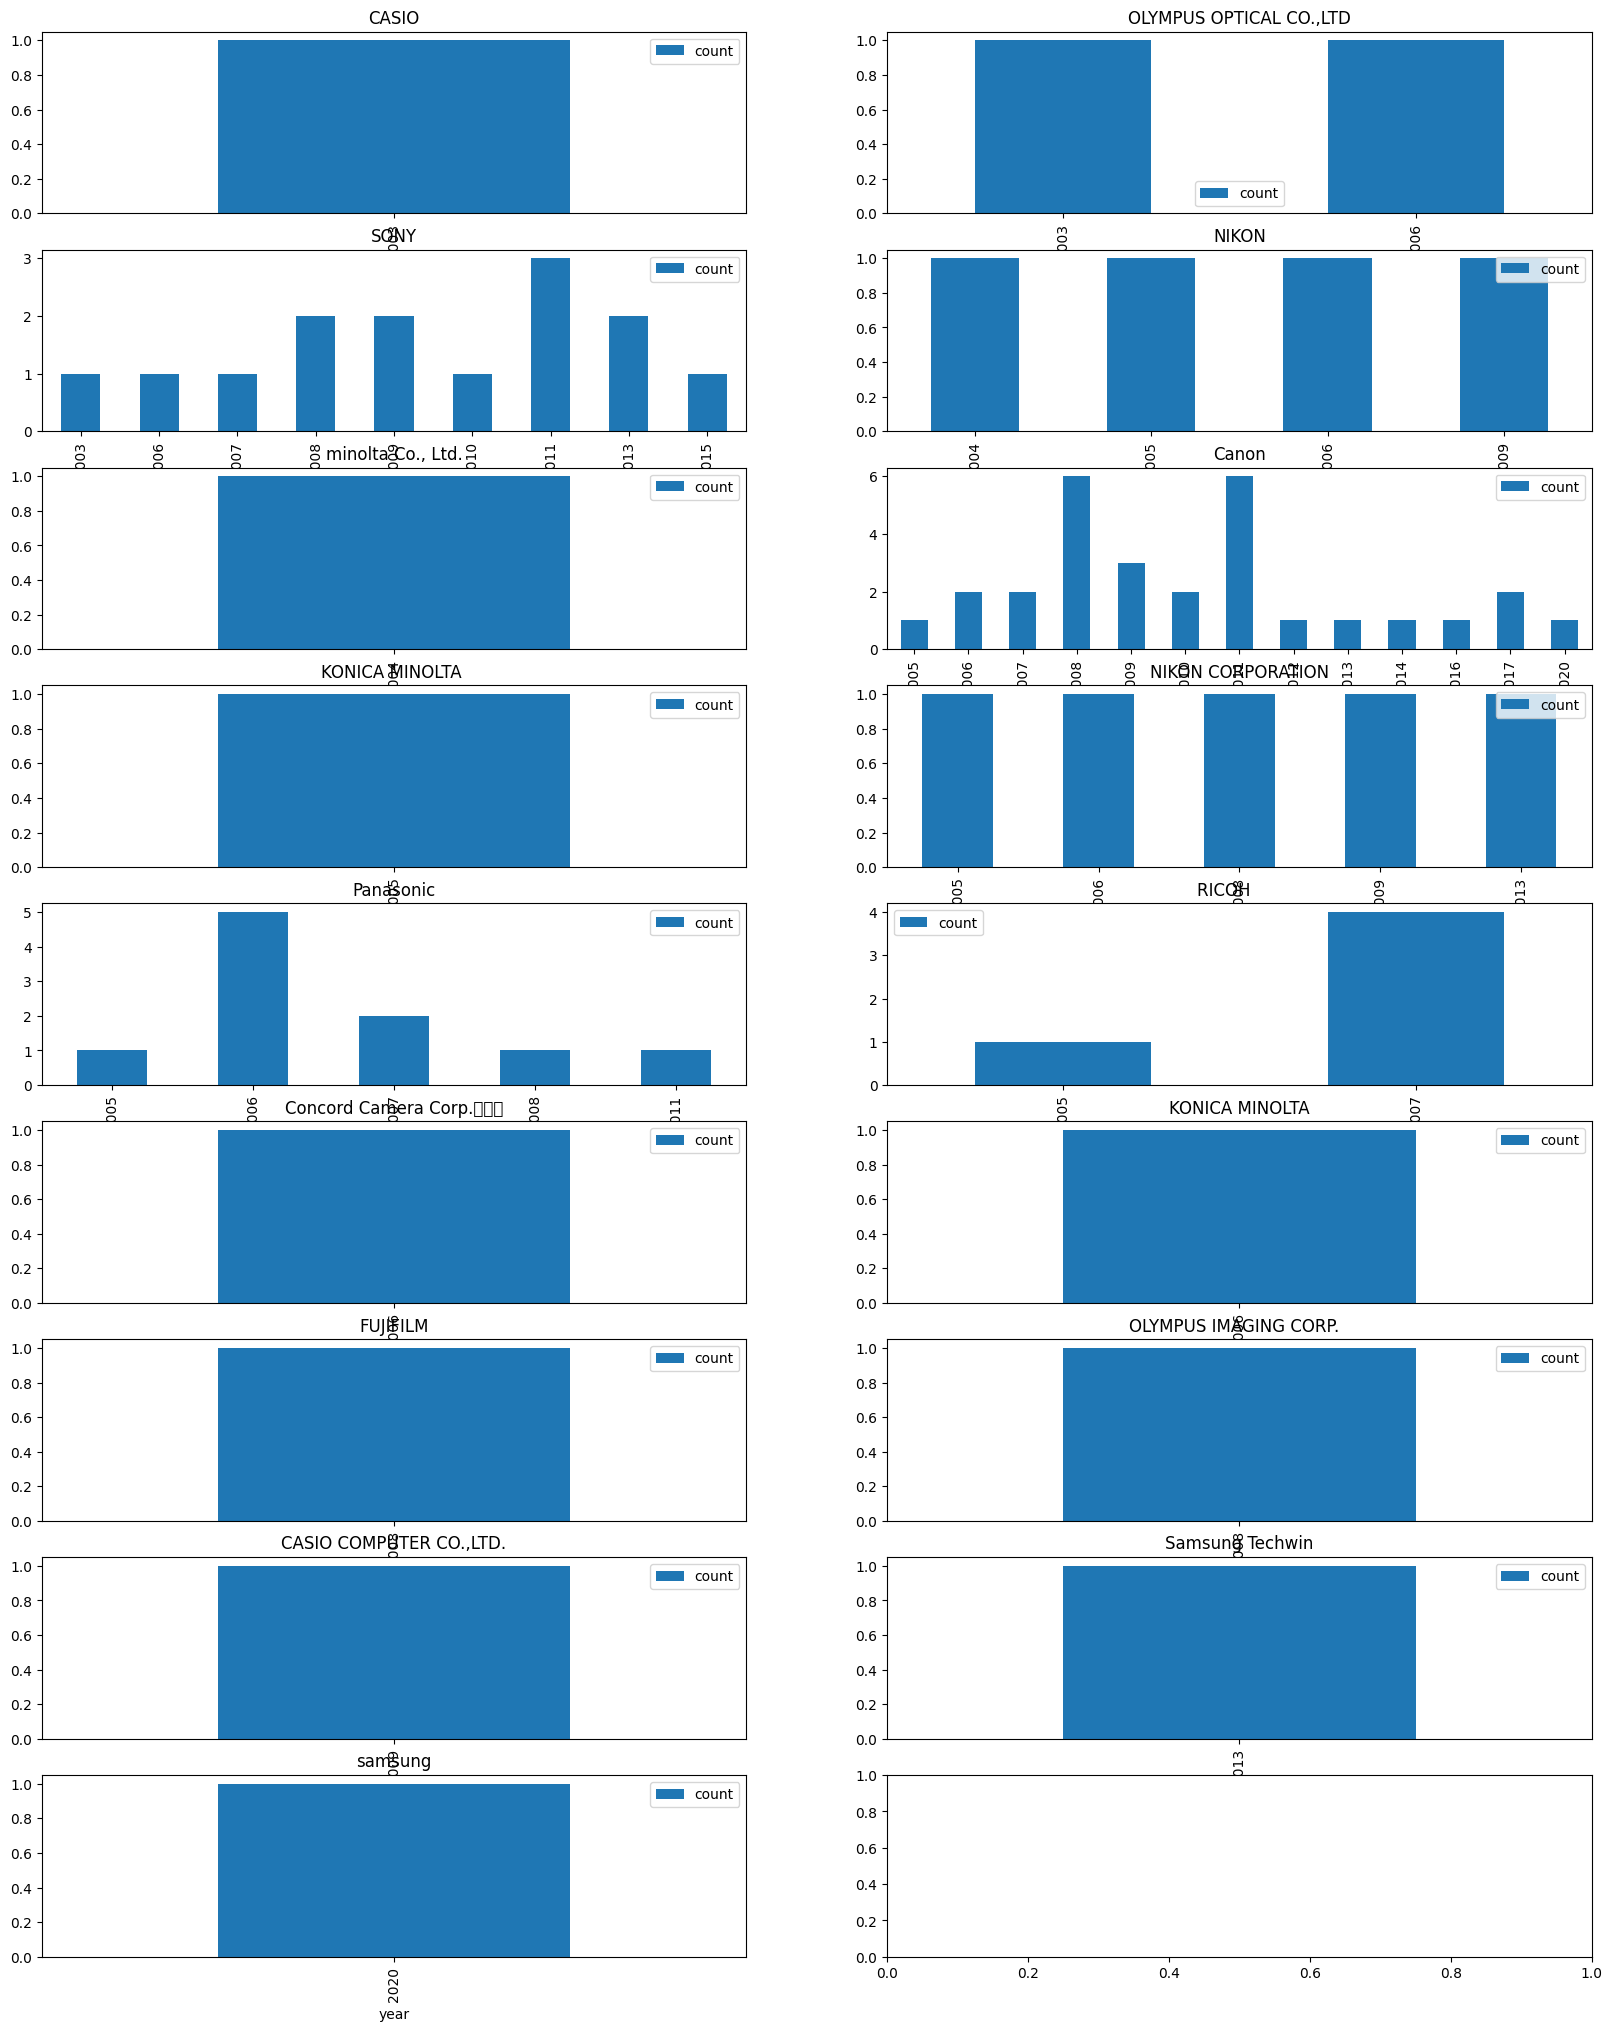

In [110]:
grouped = df.groupby(['year', 'make']).size()

grouped = grouped.reset_index(name='count')

nr = math.ceil(grouped['make'].nunique() / 2)
fig, axes = plot.subplots(nrows=nr, ncols=2, figsize=(20, 25))

for i, make in enumerate(grouped['make'].unique()):
    g = grouped[grouped['make'] == make]
    g.plot(
        x="year", y="count", kind="bar", title=make, ax=axes[math.floor(i / 2), i % 2]
    )

plot.show()


# Nombre d'images par famille (les 20 plus grandes familles)

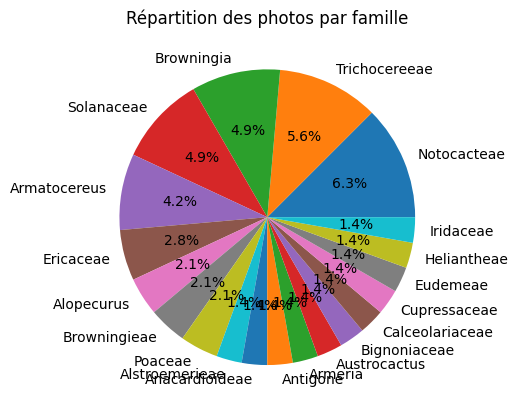

In [111]:
top_families = df.groupby('family').size().nlargest(20)
total_photos = len(df)
plot.pie(top_families.values, labels=top_families.index, autopct=lambda p: '{:.1f}%'.format(p * (sum(top_families.values)/total_photos)))
plot.title('Répartition des photos par famille')
plot.show()


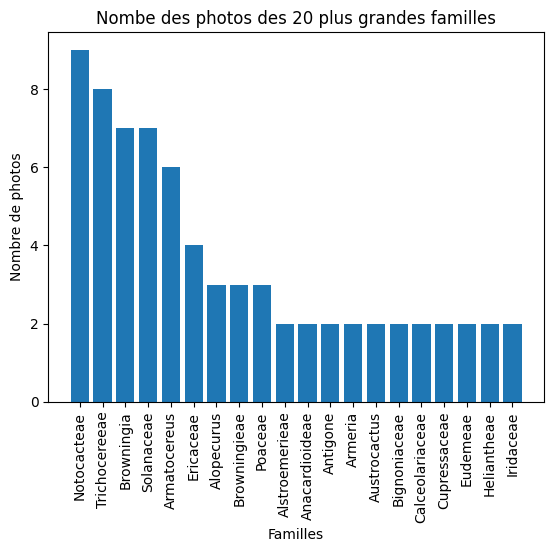

In [112]:
plot.title("Nombe des photos des 20 plus grandes familles")
plot.bar(top_families.index, top_families.values)
plot.xlabel('Familles')
plot.xticks(rotation=90)
plot.ylabel('Nombre de photos')
plot.show()


## Les 10 couleurs les plus présentes 

In [113]:
colors = [color for list_color in df['dominated_colors_name'] if list_color is not None for color in list_color]

color_counts = pd.DataFrame(colors, columns=['color'])

color_counts

,color
0,darkolivegreen
1,lightsteelblue
2,darkseagreen
3,darkslategrey
4,darkolivegreen
...,...
275,grey
276,yellowgreen
277,darkslategrey
278,peru


color
darkolivegreen    58
darkslategrey     43
darkkhaki         19
darkgrey          15
darkseagreen      15
rosybrown         15
grey              14
black             13
tan               13
dimgrey           12
dtype: int64
280


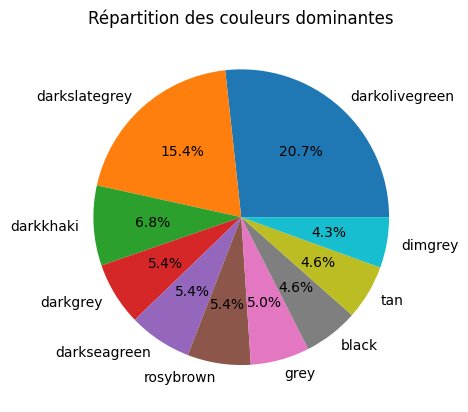

In [114]:
colors_size = color_counts.groupby("color").size().nlargest(10)
total_colors = len(color_counts)
print(colors_size)
print(total_colors)
plot.pie(colors_size.values, labels=colors_size.index, autopct=lambda p: '{:.1f}%'.format(p * (sum(colors_size.values)/total_colors)))
plot.title('Répartition des couleurs dominantes')
plot.show()

## Le nombre d'images par région géographique

In [115]:
import functools
region_size = df.groupby("location").size()
total_region = functools.reduce(lambda a, b: a+b , region_size)
print(total_region)
print(region_size)

143
location
Africa             1
Canada             3
Japan              9
South America    130
dtype: int64


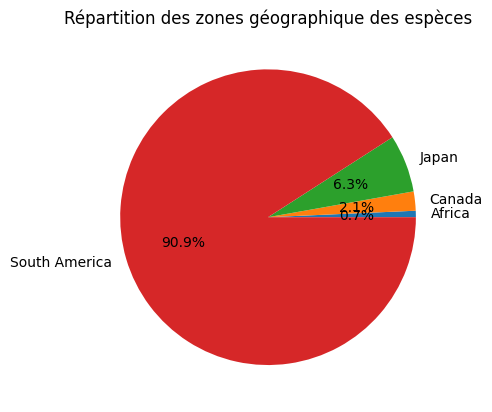

In [116]:
plot.pie(region_size.values, labels=region_size.index, autopct=lambda p: '{:.1f}%'.format(p * (sum(region_size.values)/total_region)))
plot.title('Répartition des zones géographique des espèces')
plot.show()